### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

***
Findings: 
1. Fields with missing value are: car(12576), Bar(107), CoffeeHouse(217), CarryAway(151), RestaurantLessThan20(130), Restaurant20To50(189) 
2. Column toCoupon_GEQ5min has 1 in all records. This column will not add any value to analysis
***

In [11]:
#Find columns with missing values 

missing = data.isna().sum()
print(type(missing))
print(missing)

<class 'pandas.core.series.Series'>
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [12]:
#Find count of unique values in each column 

unique_counts = data.nunique()
print(unique_counts) 

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64


destination: 50% No Urgent Place, 25% Home, 25% Work 
Passanger: 58% Alone, 26% Friend(s), 8% Partner, 8% Kid 
weather: 79% Sunny, 11% Snowy, 10% Rainy 
temperature: 51% 80, 30% 55, 18% 30 

Car: Ignore this field as it's mostly missing (99%) 
toCoupon_GEQ5min: Ignore this field as it's always 1 

People going to Work are always traveling alone (100%), People going to Home are mostly Alone (88%) and with Partner (8%) and kid (4%) a few times, People going to No Urgent Place are with friends (52%) most times, Alone (21%), with Kids (14%) and Partners (13%) 

Weather and temperature are corelated with 100% of Rainy being 55 temperature and 100% of snowy at 30 temperature


3. Decide what to do about your missing data -- drop, replace, other...

***
Findings: 
1. Car column is missing in 99% of records. I will ignore/drop this column from any analysis 
2. toCoupon_GEQ5min column has a single value (1) in all records so it will not be useful for analysis. I will ignore/drop this column from further analysis 
3. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 missing values together constitute less than 5% of records. I will drop those rows from the data frame as doing so will not reduce the dataset significantly
***

In [16]:
#Finding distinct count and proportion of records with missing value (excluding column 'car' as it is missing in 99% of records) 

missing_any_except_car_count = len(data[(data['Bar'].isna()) | (data['CoffeeHouse'].isna()) | (data['CarryAway'].isna()) | (data['RestaurantLessThan20'].isna()) | (data['Restaurant20To50'].isna()) ])
missing_percent_of_total = missing_any_except_car_count / len(data) 

print(missing_any_except_car_count) 
print(missing_percent_of_total) 

605
0.04769788710186061


In [17]:
#Creating a new dataframe addressing records with missing values and ignoring/dropping non-value adding columns 

#Filter out records with missing value (except column 'car') 
data_clean_1 = data[ ~(data['Bar'].isna()) & ~(data['CoffeeHouse'].isna()) & ~(data['CarryAway'].isna()) & ~(data['RestaurantLessThan20'].isna()) & ~(data['Restaurant20To50'].isna()) ]
print(len(data_clean_1)) 
#Records counts looks as expected 

#Drop non-value adding columns 'car' (missing in 99% records) and 'toCoupon_GEQ5min' (value 1 for all records) 
data_clean = data_clean_1.drop(['car','toCoupon_GEQ5min'], axis=1)
data_clean.info() 

12079
<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nu

4. What proportion of the total observations chose to accept the coupon?



***
Findings: 

57% of observations chose to accept the coupon i.e. coupon acceptance rate is 57%
***

In [20]:
#Finding proporting of total observations with Y = 1 
acceptance = round(data_clean['Y'].value_counts(normalize=True) * 100,1) 
print(acceptance) 

Y
1    56.9
0    43.1
Name: proportion, dtype: float64


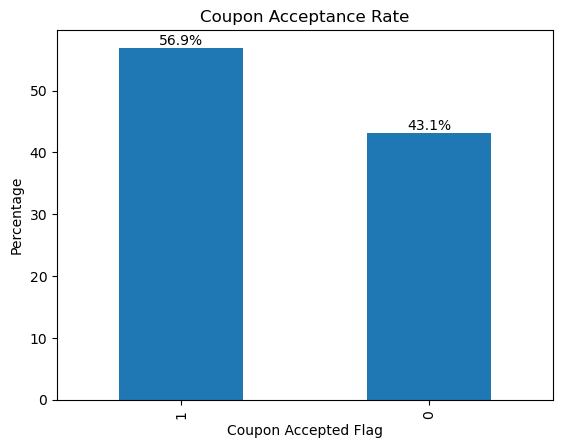

In [21]:
# Create the bar chart
acceptance.plot(kind='bar')
plt.title('Coupon Acceptance Rate')
plt.xlabel('Coupon Accepted Flag')
plt.ylabel('Percentage')
for index, value in enumerate(acceptance):
        plt.text(index,value,str(value) + "%", va='bottom', ha='center')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


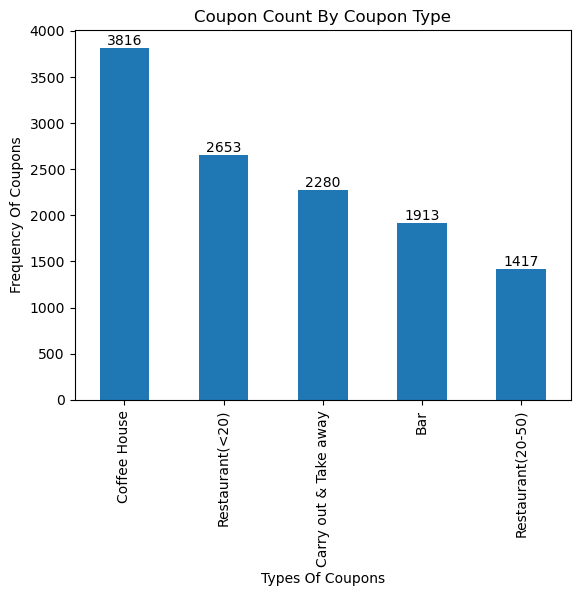

In [23]:
#Ploting a bar chart for count of coupon by type of coupon 
coup = data_clean['coupon'].value_counts()
print(coup) 
coup.plot(kind='bar')
plt.title('Coupon Count By Coupon Type')
plt.xlabel('Types Of Coupons')
plt.ylabel('Frequency Of Coupons')
for index, value in enumerate(coup):
        plt.text(index,value,str(value), va='bottom', ha='center')
plt.show()

6. Use a histogram to visualize the temperature column.

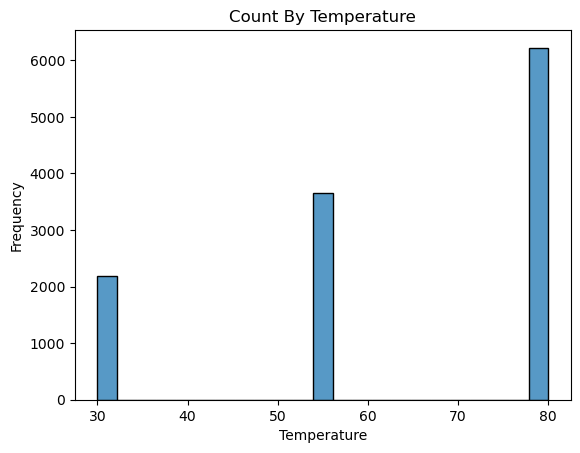

In [25]:
#Histogram to visualize temperature
sns.histplot(data_clean, x="temperature")
plt.title('Count By Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


***
Filtered data with coupon = Bar is saved in dataframe data_bar 
***

In [28]:
#Filtering for coupon = 'Bar' 
data_bar = data_clean.loc[data_clean['coupon']=='Bar'].copy() 
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


***
Findings: 41% of bar coupons were accepted 
***

In [31]:
#Finding proporting of total observations with Y = 1 
bar_acceptance = round(data_bar['Y'].value_counts(normalize=True) * 100,1)
print(bar_acceptance)

Y
0    58.8
1    41.2
Name: proportion, dtype: float64


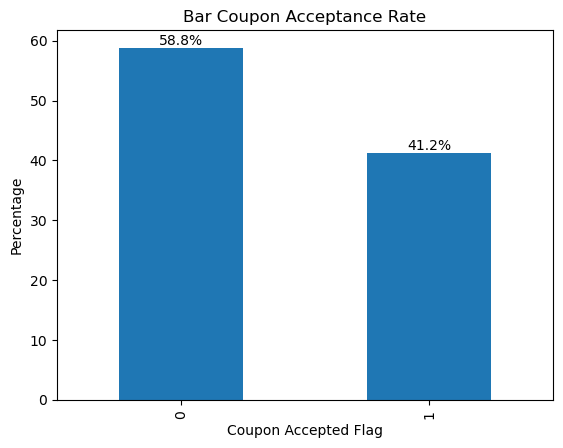

In [32]:
# Create the bar chart
bar_acceptance.plot(kind='bar')
plt.title('Bar Coupon Acceptance Rate')
plt.xlabel('Coupon Accepted Flag')
plt.ylabel('Percentage')
for index, value in enumerate(bar_acceptance):
        plt.text(index,value,str(value) + "%", va='bottom', ha='center')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


***
Findings: Those who went to bars 3 or fewer times a month tend to have lower acceptance rate for Bar coupons (37%) vs those who went to bar more (76%) 
***

In [35]:
#Checking the values in column Bar 
data_bar['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [36]:
#Create a new column based on column Bar to flag those who went to bar 3 or fewer times a month as 'bar_3_or_less' otherwise 'bar_4_or_more'
data_bar['bar_3_or_less'] = np.where(data_bar['Bar'].isin(['4~8','gt8']), 'bar_4_or_more', 'bar_3_or_less')

In [37]:
data_bar.groupby('bar_3_or_less')['Y'].value_counts()

bar_3_or_less  Y
bar_3_or_less  0    1079
               1     641
bar_4_or_more  1     147
               0      46
Name: count, dtype: int64

In [38]:
#Accpetance rates for those who went to bar 3 or fewer times a month vs those who went more 
bar_acceptance_by_bar_frequency = round(data_bar.groupby('bar_3_or_less')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['bar_3_or_less', 'Y'])
print(bar_acceptance_by_bar_frequency)

   bar_3_or_less  Y  percentage
0  bar_3_or_less  0        62.7
1  bar_3_or_less  1        37.3
3  bar_4_or_more  0        23.8
2  bar_4_or_more  1        76.2


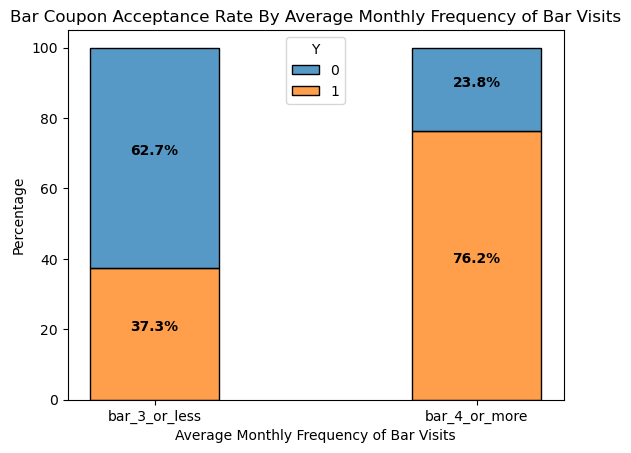

In [39]:
#Create a plot to compare acceptance rates for those who visit bars 3 or less times to those who visit bars greater than 3 times monthly

myplot = sns.histplot(data=bar_acceptance_by_bar_frequency, x="bar_3_or_less" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper center")
plt.title('Bar Coupon Acceptance Rate By Average Monthly Frequency of Bar Visits')
plt.xlabel('Average Monthly Frequency of Bar Visits')
plt.ylabel('Percentage')

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )
plt.show() 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


***
Findings: 
We have established that those who go to bar less frequently are less likely to accept Bar coupons (acceptance rate for those that go to bar less than once is 30% vs those that go to bar 1 or more times is 69%) 

Now, comparing acceptance rate based on age for those that go to bars more than once a month: 
There isn't significant difference in coupon acceptance rate between those over the age of 25 (69%) to those under the age of 25 (68%) 
***

In [42]:
#Create a new column based on column Bar to flag those who went to bar 1 or more times a month 
data_bar['bar_1_or_more'] = np.where(data_bar['Bar'].isin(['never','less1']), 'bar_less_than_1', 'bar_1_or_more')

In [43]:
#Looking at row counts to ensure we have sizable buckets for further analysis 
data_bar.groupby('bar_1_or_more')['Y'].size()

bar_1_or_more
bar_1_or_more       572
bar_less_than_1    1341
Name: Y, dtype: int64

In [44]:
#Looking at acceptance rate before plotting  
bar_acceptance_by_bar_frequency = round(data_bar.groupby('bar_1_or_more')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['bar_1_or_more', 'Y'])
print(bar_acceptance_by_bar_frequency)

     bar_1_or_more  Y  percentage
1    bar_1_or_more  0        31.5
0    bar_1_or_more  1        68.5
2  bar_less_than_1  0        70.5
3  bar_less_than_1  1        29.5


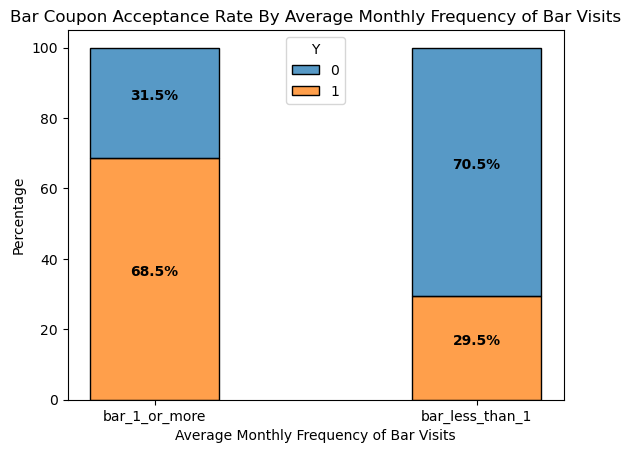

In [45]:
#Create a plot to compare acceptance rates for those who visit bars less than once to those who visit bars greater than once monthly

myplot = sns.histplot(data=bar_acceptance_by_bar_frequency, x="bar_1_or_more" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper center")
plt.title('Bar Coupon Acceptance Rate By Average Monthly Frequency of Bar Visits')
plt.xlabel('Average Monthly Frequency of Bar Visits')
plt.ylabel('Percentage')

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )
plt.show() 

In [46]:
#Create another column based on column Age to flag those who are great than 25 years  
data_bar['age_over_25'] = np.where(data_bar['age'].isin(['below21','21']), 'age_25_and_below', 'age_over_25')

In [47]:
#Looking at row counts to ensure we have sizable buckets for further analysis  
data_bar.groupby(['bar_1_or_more','age_over_25']).size()

bar_1_or_more    age_over_25     
bar_1_or_more    age_25_and_below     169
                 age_over_25          403
bar_less_than_1  age_25_and_below     309
                 age_over_25         1032
dtype: int64

In [48]:
#Acceptance rates for those who went to bar more than once a month and are over the age of 25 to all others 
#Looking at acceptance rate before plotting   
data_bar.groupby(['bar_1_or_more','age_over_25'])['Y'].value_counts(normalize=True)

bar_1_or_more    age_over_25       Y
bar_1_or_more    age_25_and_below  1    0.674556
                                   0    0.325444
                 age_over_25       1    0.689826
                                   0    0.310174
bar_less_than_1  age_25_and_below  0    0.611650
                                   1    0.388350
                 age_over_25       0    0.732558
                                   1    0.267442
Name: proportion, dtype: float64

In [49]:
#Create new dataframe for those who go to bar greater than once monthly 
data_bar_1_or_more = data_bar.loc[data_bar['bar_1_or_more']=='bar_1_or_more'].copy() 
data_bar_1_or_more.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 90 to 12544
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           572 non-null    object
 1   passanger             572 non-null    object
 2   weather               572 non-null    object
 3   temperature           572 non-null    int64 
 4   time                  572 non-null    object
 5   coupon                572 non-null    object
 6   expiration            572 non-null    object
 7   gender                572 non-null    object
 8   age                   572 non-null    object
 9   maritalStatus         572 non-null    object
 10  has_children          572 non-null    int64 
 11  education             572 non-null    object
 12  occupation            572 non-null    object
 13  income                572 non-null    object
 14  Bar                   572 non-null    object
 15  CoffeeHouse           572 non-null    obje

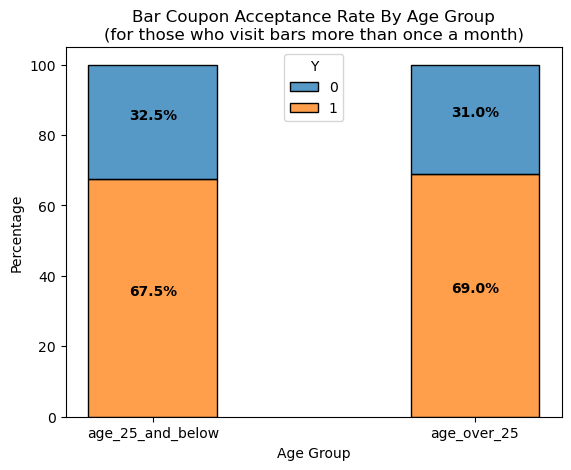

In [50]:
#Create dataframe with acceptance rate using group by age 
bar1_or_more_acceptance_by_age = round(data_bar_1_or_more.groupby('age_over_25')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['age_over_25', 'Y'])

#Create a plot to compare acceptance rates for those who are over 25 years old vs those who are 25 years or under 
myplot = sns.histplot(data=bar1_or_more_acceptance_by_age, x="age_over_25" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper center")
plt.title('Bar Coupon Acceptance Rate By Age Group\n(for those who visit bars more than once a month)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )
plt.show() 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


***
Findings about bar coupon acceptance rate based on co-passanger and occupation of driver: 

1. Drivers traveling with kids tend to have lower bar coupon acceptance rate (38%) compared to when they travel alone (71%) or with other adult passanger(s) (71%) 
2. Unemployed travelers tend to have higher coupon acceptance rate (78%) compared to those that are employed (67%) or are students (68%)
***

In [53]:
#Count by passanger type given that travelers go to bars more than once in a month
print(data_bar_1_or_more.groupby(['passanger']).size()) 

passanger
Alone        341
Friend(s)    116
Kid(s)        42
Partner       73
dtype: int64


In [54]:
#Create a column based on accompaning passanger 
def categorize(row):
    if row['passanger'] == 'Kid(s)':
        return 'With Kid(s)'
    elif row['passanger'] == 'Alone':
        return row['passanger'] 
    else:
        return 'With Other Adults'

data_bar_1_or_more['passanger_category'] = data_bar_1_or_more.apply(categorize, axis=1)

print(data_bar_1_or_more.groupby(['passanger_category']).size()) 

passanger_category
Alone                341
With Kid(s)           42
With Other Adults    189
dtype: int64


In [55]:
#Checking the acceptance rate for travelers by passanger type given that they go to bars more than once in a month 
print(data_bar_1_or_more.groupby('passanger_category')['Y'].value_counts(normalize=True) ) 

passanger_category  Y
Alone               1    0.706745
                    0    0.293255
With Kid(s)         0    0.619048
                    1    0.380952
With Other Adults   1    0.714286
                    0    0.285714
Name: proportion, dtype: float64


In [56]:
#Count by occupation given that travelers go to bars more than once in a month
print(data_bar_1_or_more.groupby(['occupation']).size()) 
round(data_bar_1_or_more.loc[data_bar_1_or_more['Y']==1].groupby('occupation').size()/data_bar_1_or_more.groupby('occupation').size() * 100,1)

occupation
Architecture & Engineering                    6
Arts Design Entertainment Sports & Media     23
Building & Grounds Cleaning & Maintenance     4
Business & Financial                         28
Community & Social Services                   6
Computer & Mathematical                      57
Construction & Extraction                     7
Education&Training&Library                   21
Food Preparation & Serving Related           15
Healthcare Practitioners & Technical         18
Healthcare Support                           11
Installation Maintenance & Repair            11
Legal                                        17
Life Physical Social Science                  3
Management                                   48
Office & Administrative Support              40
Personal Care & Service                      11
Production Occupations                       10
Protective Service                           15
Retired                                       5
Sales & Related              

occupation
Architecture & Engineering                   100.0
Arts Design Entertainment Sports & Media      78.3
Building & Grounds Cleaning & Maintenance     25.0
Business & Financial                          60.7
Community & Social Services                   83.3
Computer & Mathematical                       57.9
Construction & Extraction                     85.7
Education&Training&Library                    42.9
Food Preparation & Serving Related            73.3
Healthcare Practitioners & Technical          66.7
Healthcare Support                            90.9
Installation Maintenance & Repair             45.5
Legal                                         58.8
Life Physical Social Science                  66.7
Management                                    75.0
Office & Administrative Support               75.0
Personal Care & Service                       63.6
Production Occupations                        80.0
Protective Service                            80.0
Retired             

In [57]:
#Create a column to categorize occupation based on column occupation (for travelers who go to bars more than once in a month) 
def categorize_occupation(row):
    if (row['occupation'] == 'Unemployed' or row['occupation'] == 'Student') :
        return row['occupation']
    else:
        return 'Employed'

data_bar_1_or_more['occupation_category'] = data_bar_1_or_more.apply(categorize_occupation, axis=1)

print(data_bar_1_or_more.groupby(['occupation_category']).size()) 
round(data_bar_1_or_more.loc[data_bar_1_or_more['Y']==1].groupby('occupation_category').size()/data_bar_1_or_more.groupby('occupation_category').size() * 100,1)

occupation_category
Employed      433
Student        66
Unemployed     73
dtype: int64


occupation_category
Employed      67.0
Student       68.2
Unemployed    78.1
dtype: float64

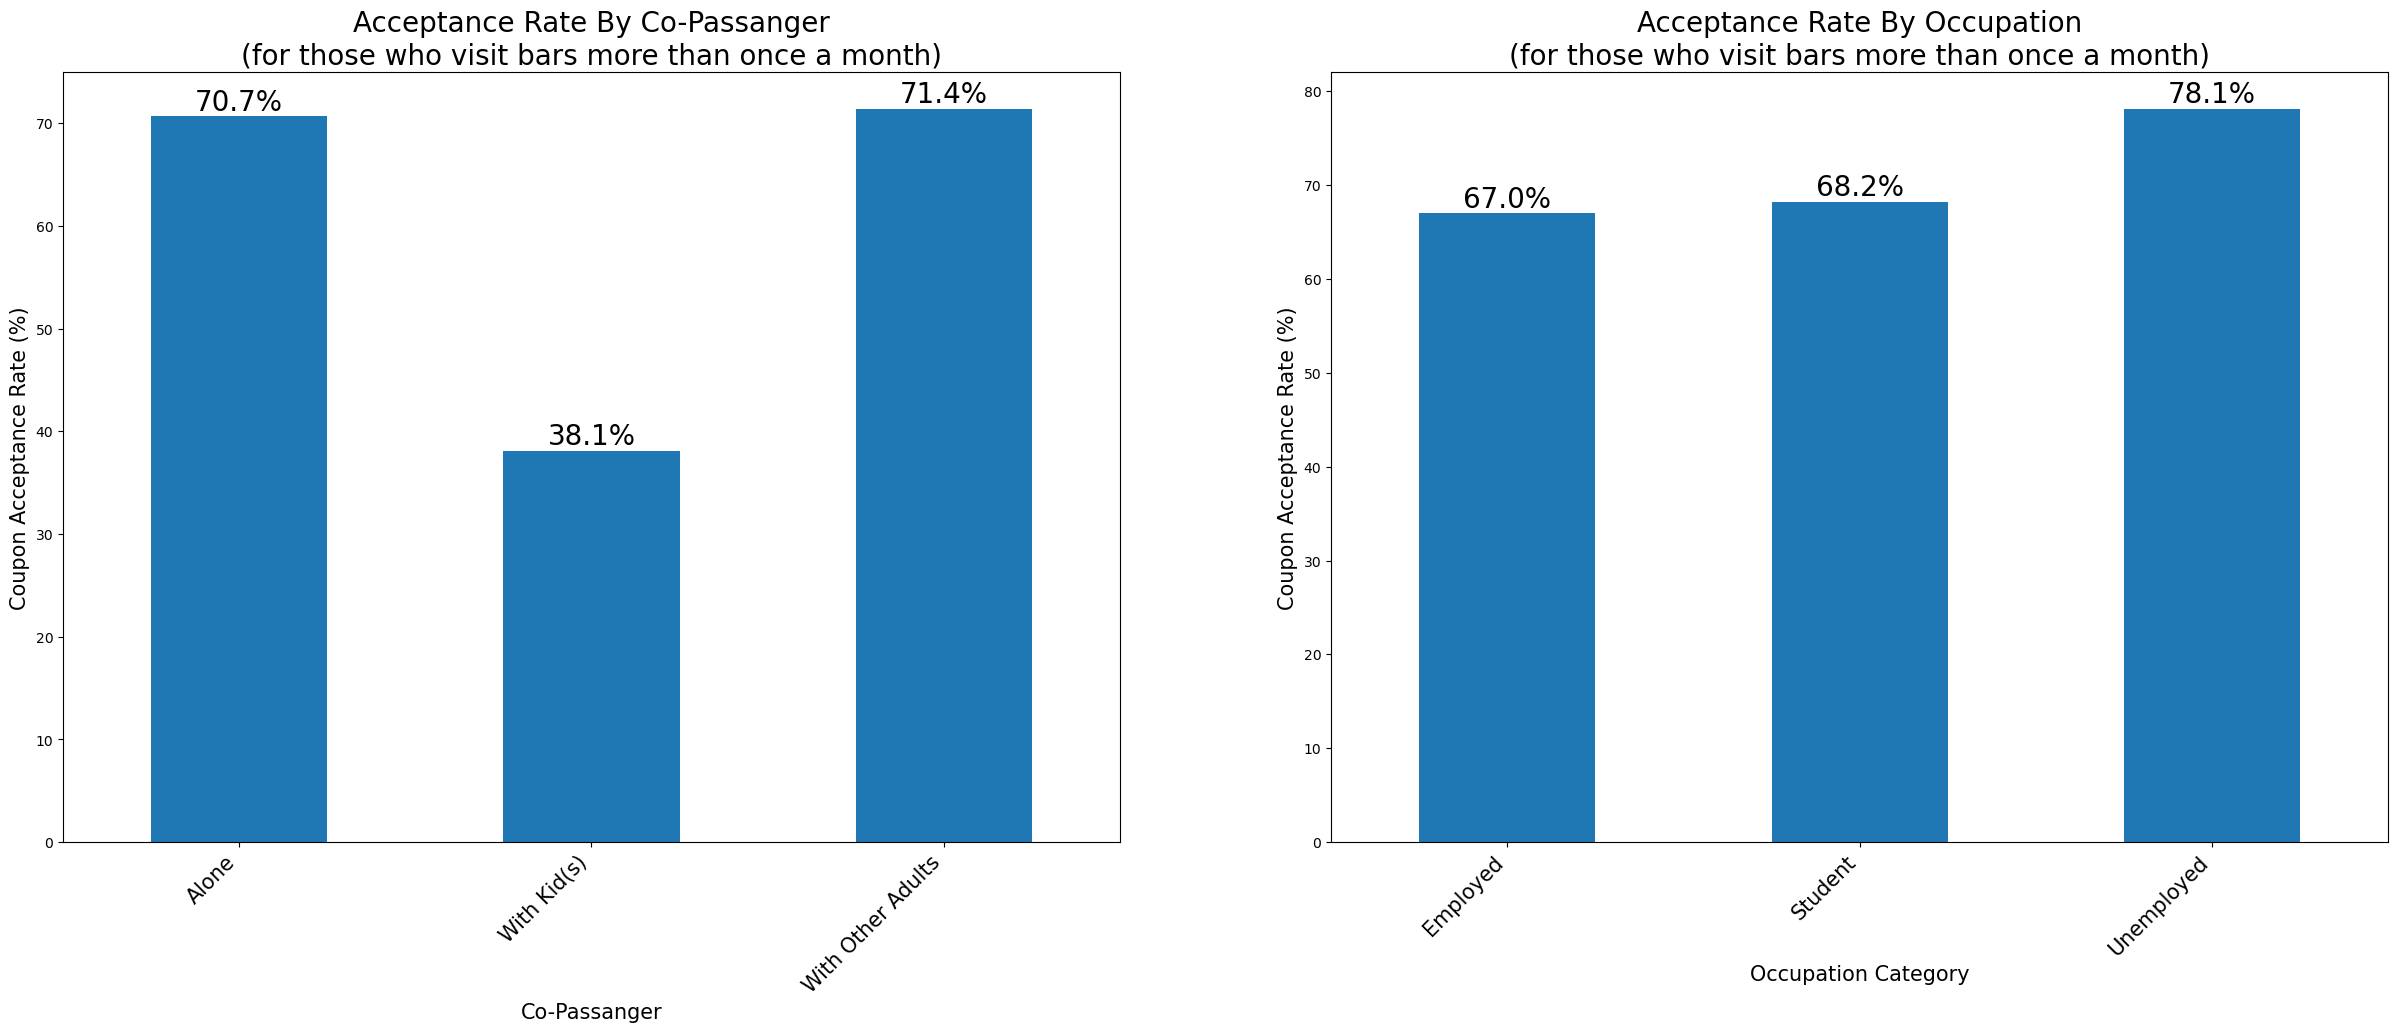

In [58]:
bar1_or_more_acceptance_by_passanger = round(data_bar_1_or_more.loc[data_bar_1_or_more['Y']==1].groupby('passanger_category').size()/data_bar_1_or_more.groupby('passanger_category').size() * 100,1)
bar1_or_more_acceptance_by_occupation = round(data_bar_1_or_more.loc[data_bar_1_or_more['Y']==1].groupby('occupation_category').size()/data_bar_1_or_more.groupby('occupation_category').size() * 100,1)


plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot1 = bar1_or_more_acceptance_by_passanger.plot.bar()
plt.title('Acceptance Rate By Co-Passanger\n(for those who visit bars more than once a month)',fontsize=20)
plt.xlabel('Co-Passanger',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.ylabel('Coupon Acceptance Rate (%)',fontsize=15)
# Add data labels
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:  
       plot1.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=20, color='black'
        )

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot1 = bar1_or_more_acceptance_by_occupation.plot.bar()
plt.title('Acceptance Rate By Occupation\n(for those who visit bars more than once a month)',fontsize=20)
plt.xlabel('Occupation Category',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.ylabel('Coupon Acceptance Rate (%)',fontsize=15)
# Add data labels
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:  
       plot1.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=20, color='black'
        )
        
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



***
Acceptance Rate of the 3 groups is as follows: 
* go to bars more than once a month, had passengers that were not a kid, and were not widowed  - 71% 
* go to bars more than once a month and are under the age of 30 - 72% 
* go to cheap restaurants more than 4 times a month and income is less than 50K - 46%
***

In [61]:
#Go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_1more_nokids_notwidowed = data_bar.loc[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) 
                                           & (data_bar['passanger'] != 'Kid(s)') 
                                           & (data_bar['maritalStatus'] != 'Widowed')]
bar_1more_nokids_notwidowed_acceptance_rate = round(bar_1more_nokids_notwidowed['Y'].value_counts(normalize=True).rename('Acceptance Rate').sort_index() * 100,1)

#Go to bars more than once a month and are under the age of 30
bar_1more_under30 = data_bar.loc[(data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar['age'].isin(['below21','21','26']))]
bar_1more_under30_acceptance_rate = round(bar_1more_under30['Y'].value_counts(normalize=True).rename('Acceptance Rate').sort_index() * 100,1)

#Go to cheap restaurants more than 4 times a month and income is less than 50K 
cheapRestaurant4More_incomeLessThan50K = data_bar.loc[(data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) 
                                            & (data_bar['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
cheapRestaurant4More_incomeLessThan50K_acceptance_rate = round(cheapRestaurant4More_incomeLessThan50K['Y'].value_counts(normalize=True).rename('Acceptance Rate').sort_index() * 100,1)

print(bar_1more_nokids_notwidowed_acceptance_rate)
print(bar_1more_under30_acceptance_rate)
print(cheapRestaurant4More_incomeLessThan50K_acceptance_rate)

Y
0    29.1
1    70.9
Name: Acceptance Rate, dtype: float64
Y
0    28.0
1    72.0
Name: Acceptance Rate, dtype: float64
Y
0    53.8
1    46.2
Name: Acceptance Rate, dtype: float64


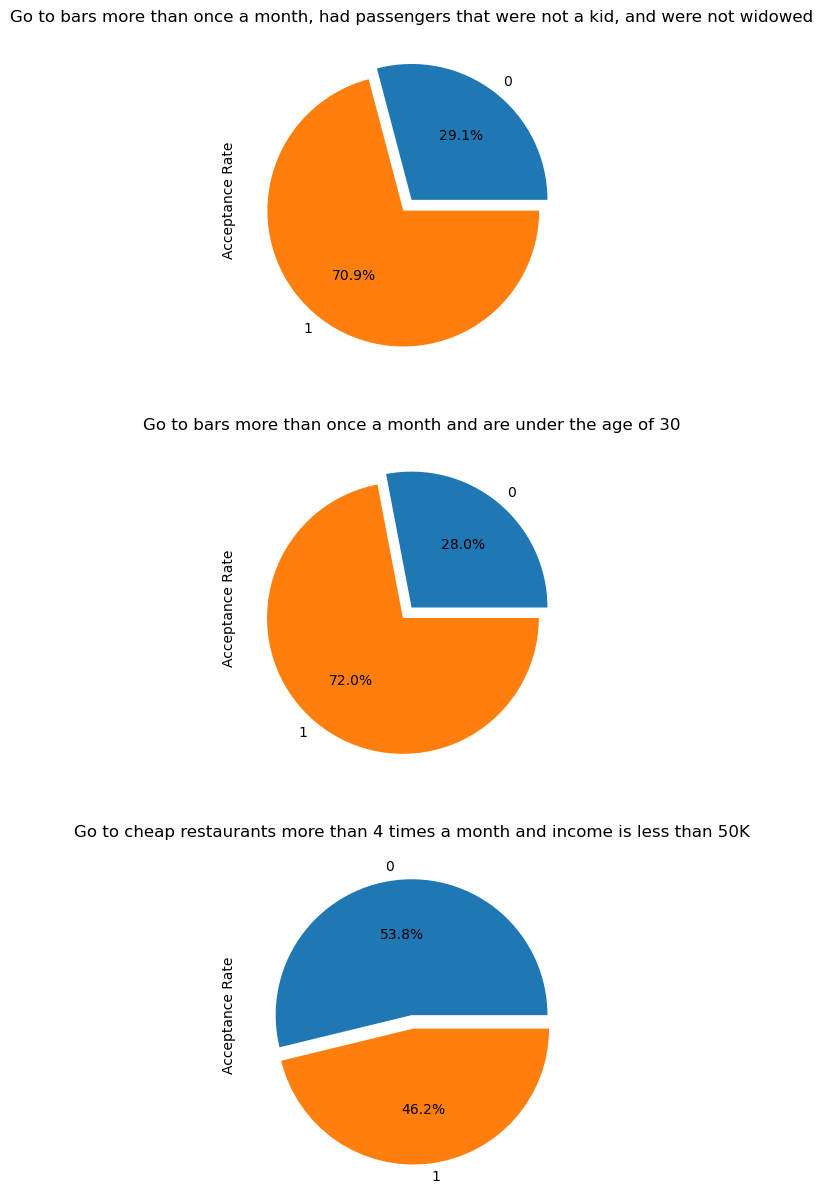

In [62]:
#Visualizing above data 

explode = (0, 0.1) 

plt.figure(figsize=(15, 15))

ax = plt.subplot(3, 1, 1)  # 3 row, 1 columns, first subplot
plot1 = bar_1more_nokids_notwidowed_acceptance_rate.plot.pie(explode=explode,labels=bar_1more_nokids_notwidowed_acceptance_rate.index, autopct='%1.1f%%')
plt.title('Go to bars more than once a month, had passengers that were not a kid, and were not widowed')

plt.subplot(3, 1, 2)  # 3 row, 1 columns, second subplot
plot1 = bar_1more_under30_acceptance_rate.plot.pie(explode=explode,labels=bar_1more_under30_acceptance_rate.index, autopct='%1.1f%%')
plt.title('Go to bars more than once a month and are under the age of 30')

plt.subplot(3, 1, 3)  # 3 row, 1 columns, third subplot
plot1 = cheapRestaurant4More_incomeLessThan50K_acceptance_rate.plot.pie(explode=explode,labels=cheapRestaurant4More_incomeLessThan50K_acceptance_rate.index, autopct='%1.1f%%')
plt.title('Go to cheap restaurants more than 4 times a month and income is less than 50K')

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

***
Following hypotheses are validated: 
* Frequency of going to bar is more indicative of likeliness of acceptance of Bar coupon (travelers who go to bar less than once monthly are less likely to accept bar coupons) 
* Those traveling with kids are less likely to accept bar coupons (travelers with kids have lower bar coupon acceptance rate compared to those traveling alone or with adult companions)
* Unemployed drivers likely to accept bar coupons (acceptance rate of those who are unemployed is higher than the acceptance rates of employed drivers and students) 

Following hypotheses are invalidated: 
* Travelers of certain age are more/less likely to accept bar coupons (invalidated because there's no difference in coupon acceptance rate based on age)
* Just like unemployed have higher acceptance rates, those with lower incomes have higher acceptance rates too (invalidated because we saw that those that go to cheap restaurants and have lower income tend to accept coupons less than others) 
***

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

***
I am choosing 'Coffee House' Coupon for exploratory analysis 
***

In [67]:
#Filtering for coupon = 'Coffee House' 
data_coffee = data_clean.loc[data_clean['coupon']=='Coffee House'].copy() 
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

***
Now let's look at the acceptance rate for Coffee coupon

Findings: The acceptance rate for coffee coupon is 50% 
***

Y
0    50.4
1    49.6
Name: proportion, dtype: float64


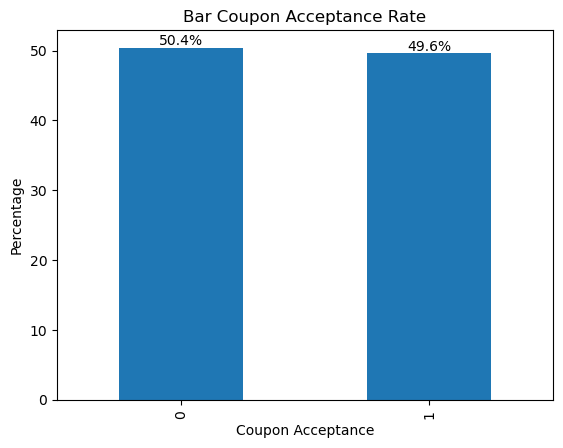

In [69]:
#Finding proporting of total observations with Y = 1 
coffee_acceptance = round(data_coffee['Y'].value_counts(normalize=True) * 100,1)
print(coffee_acceptance)
# Create the bar chart
coffee_acceptance.plot(kind='bar')
plt.title('Bar Coupon Acceptance Rate')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Percentage')
for index, value in enumerate(coffee_acceptance):
        plt.text(index,value,str(value) + "%", va='bottom', ha='center')
plt.show()

In [70]:
print(data_coffee.groupby(['CoffeeHouse'])['Y'].value_counts() )
print(data_coffee.groupby(['CoffeeHouse'])['Y'].value_counts(normalize=True) )

CoffeeHouse  Y
1~3          1    660
             0    359
4~8          1    346
             0    161
gt8          1    225
             0    117
less1        0    546
             1    506
never        0    739
             1    157
Name: count, dtype: int64
CoffeeHouse  Y
1~3          1    0.647694
             0    0.352306
4~8          1    0.682446
             0    0.317554
gt8          1    0.657895
             0    0.342105
less1        0    0.519011
             1    0.480989
never        0    0.824777
             1    0.175223
Name: proportion, dtype: float64


1. Acceptance rate is high when travelers are going to no urgent place 
2. Solo travelers or traveling with kids have low acceptrance compared to those traveling with company
3. 10AM acceptance rate is high    ---- pair this with expiry
4. 1D expiration coupons have higher acceptance, only when the time is 10am 2h expiry has higher acceptance rate
5. Lower income has higher acceptance rate (50K and below)
6. Coffee House visits more than 1 once has higher acceptance rate 

1. Does the driving destination play influence acceptance rate of coffee coupon? Are travelers going to no urgent destination more likely to accept coffee coupon? 

***
Driving destination does influence coffee coupon acceptance rate. Travelers going to no urgent destination have higher coupon acceptance rate (58%) than those traveling to work (44%) and those traveling home (36%) 
***

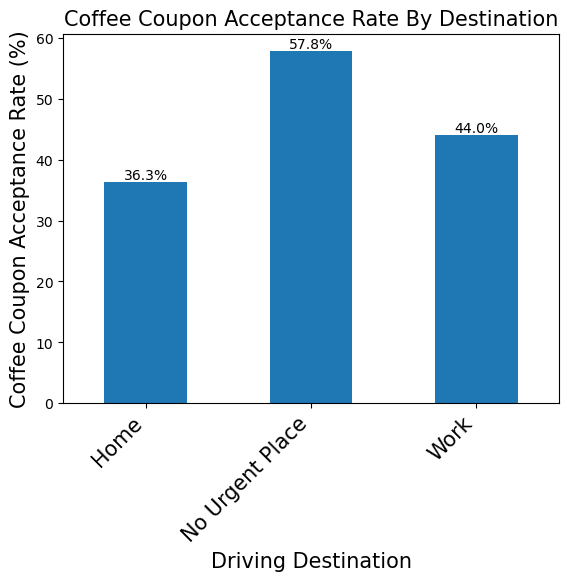

In [74]:
#Compute acceptance rate by driving destination 
coffee_acceptance_rate_by_dest = round(data_coffee[data_coffee['Y']==1].groupby('destination').size()/data_coffee.groupby('destination').size() * 100,1)

#Draw a plot to visualize the acceptance rate by destination 
plot1 = coffee_acceptance_rate_by_dest.plot.bar()
plt.title('Coffee Coupon Acceptance Rate By Destination',fontsize=15)
plt.xlabel('Driving Destination',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.ylabel('Coffee Coupon Acceptance Rate (%)',fontsize=15)
# Add data labels
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:  
       plot1.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, color='black'
        )

2. We saw that travelers going to no urgent destination have higher coupon acceptance rate than those traveling to work or those traveling home. Does the acceptance rate differ if there's a kid co-passanger vs alone or with other adult co-passanger? 

***
Acceptance rate drops (47%) for those traveling to no urgent destination when they have a kid co-passanger compared to those traveling alone (58%) or with other other adults (60% when with friends and 57% when with partner) 
***

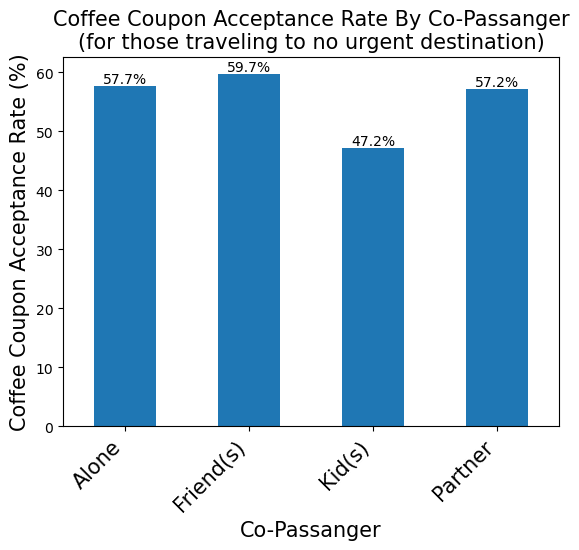

In [77]:
#Compute acceptance rate by co-passange when driving destination is no urgent place 
coffee_acceptance_rate_no_urgent_dest_by_passanger = round(data_coffee.loc[(data_coffee['destination'] == 'No Urgent Place') & (data_coffee['Y']==1)].groupby('passanger').size() / 
      data_coffee.loc[(data_coffee['destination'] == 'No Urgent Place')].groupby('passanger').size() * 100,1)

#Draw a plot to visualize the acceptance rate by co-passanger when driving destination is no urgent place 
plot1 = coffee_acceptance_rate_no_urgent_dest_by_passanger.plot.bar()
plt.title('Coffee Coupon Acceptance Rate By Co-Passanger\n(for those traveling to no urgent destination)',fontsize=15)
plt.xlabel('Co-Passanger',fontsize=15)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.ylabel('Coffee Coupon Acceptance Rate (%)',fontsize=15)
# Add data labels
for patch in plot1.patches:
    height = patch.get_height()
    if height > 0:  
       plot1.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, color='black'
        )

3. Does the coffee coupon acceptance rate get influenced by time of day? Are traveler more likely to accept coupons around 10AM or afternoon 2PM? 

***
Coffee coupon acceptance rate is highest at 10am and lower any other time of the day 
***

In [80]:
data_coffee['time_group'] = np.where(data_coffee['time'].isin(['7AM','6PM','10PM']), 'Any Other Time', data_coffee['time'])

In [81]:
print(data_coffee.groupby(['time_group'])['Y'].value_counts(normalize=True) )

time_group      Y
10AM            1    0.634772
                0    0.365228
2PM             1    0.545455
                0    0.454545
Any Other Time  0    0.574545
                1    0.425455
Name: proportion, dtype: float64


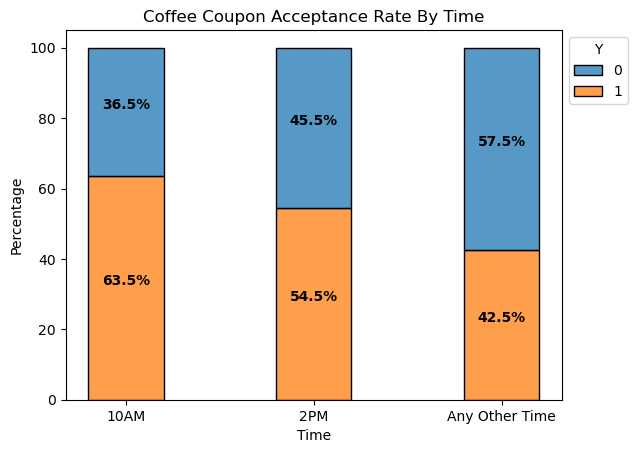

In [82]:
#Create dataframe with acceptance rate using group by time 
coffee_acceptance_by_time = round(data_coffee.groupby('time_group')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['time_group', 'Y'])

#Create a plot to compare acceptance rates by time of day  
myplot = sns.histplot(data=coffee_acceptance_by_time, x="time_group" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))
plt.title('Coffee Coupon Acceptance Rate By Time')
plt.xlabel('Time')
plt.ylabel('Percentage')

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )
plt.show() 

4. Does the coupon acceptance rate change for time other than 10AM if the coupon expiration is longer than 2 hours? 

***
Acceptance rate is higher when coupon expiration is 1 day

**Recommendation:** Increasing coupon expiration to 1 day will likely get travelers to accept coffee coupons at times other than 10am 
***

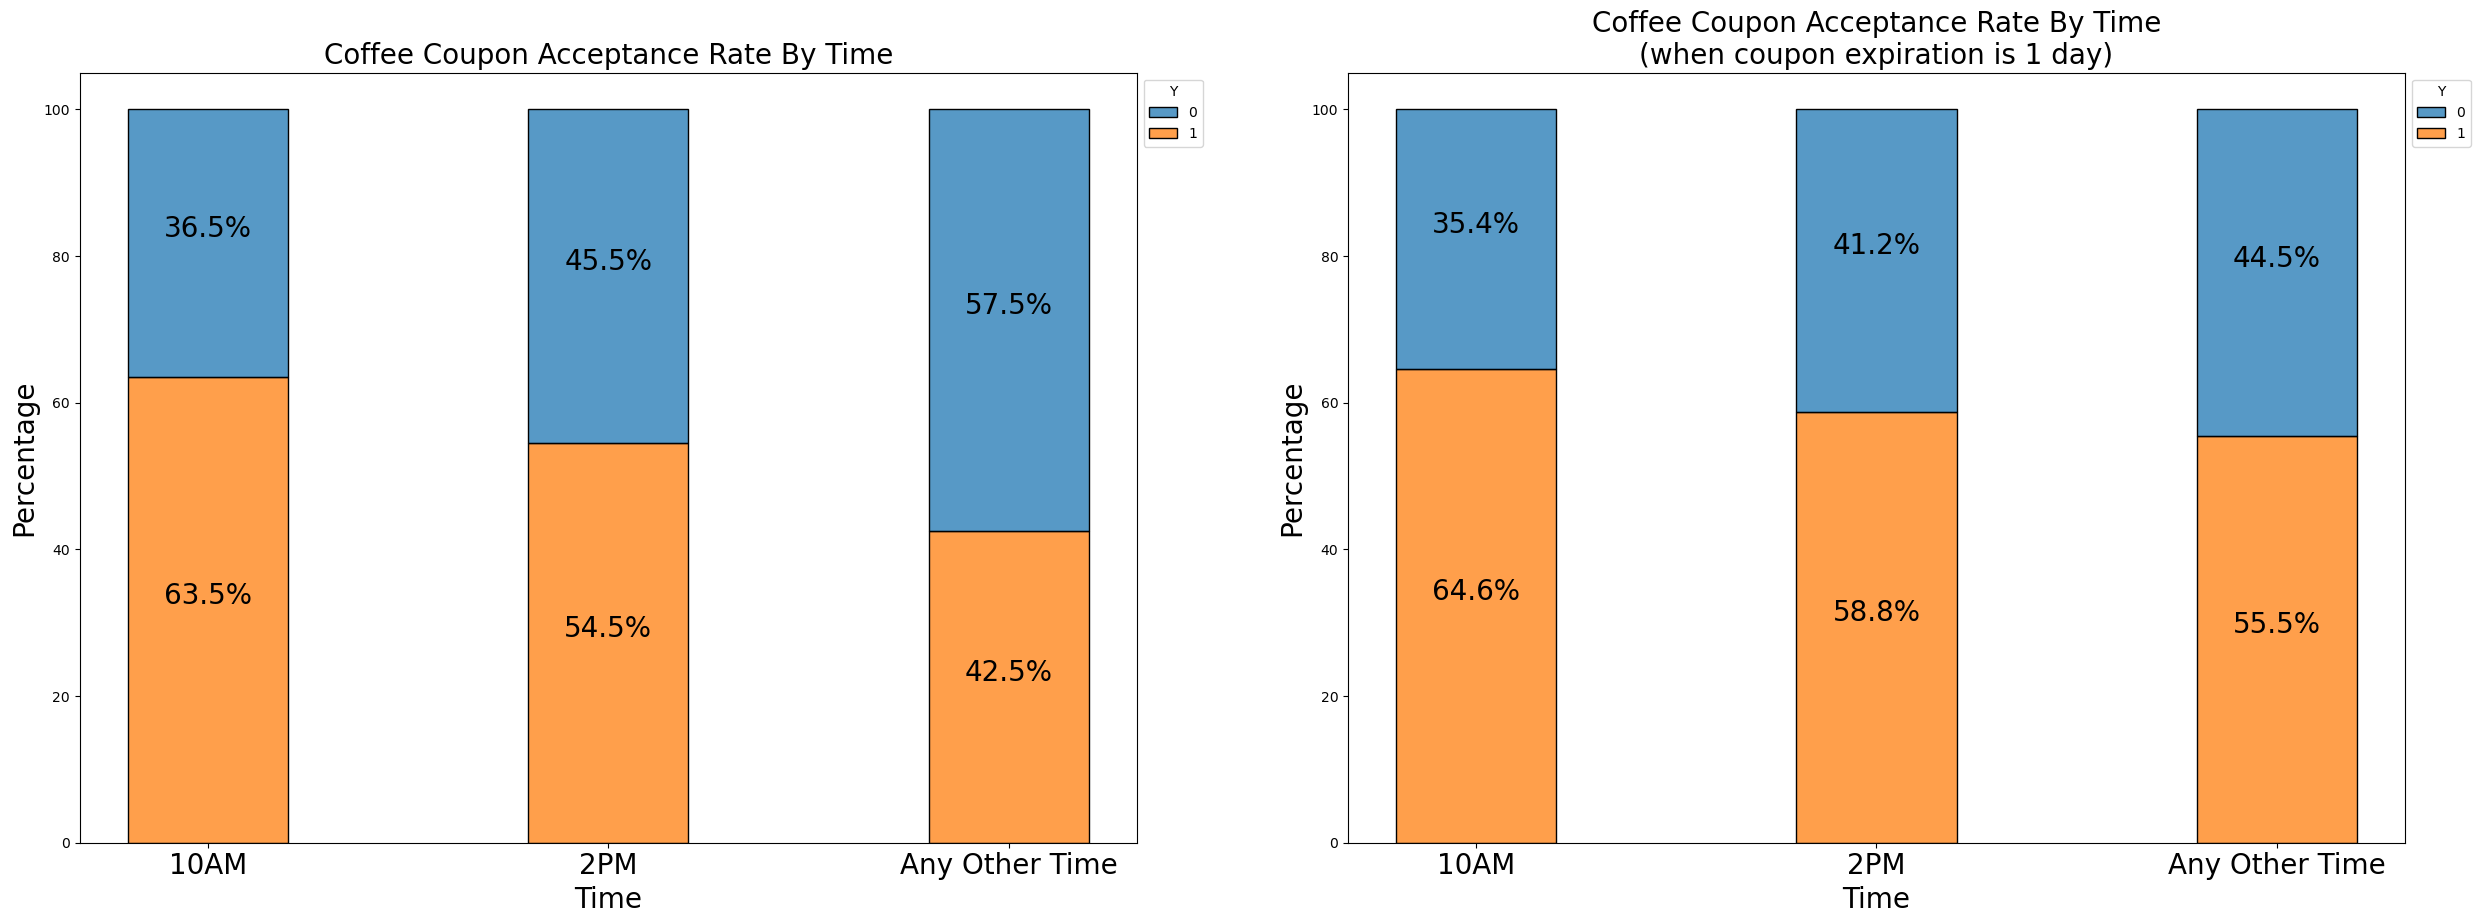

In [85]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
#Create a plot to compare acceptance rates by time of day  
myplot = sns.histplot(data=coffee_acceptance_by_time, x="time_group" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))
plt.title('Coffee Coupon Acceptance Rate By Time',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Percentage',fontsize=20)

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=20, color='black'
        )

coffee_acceptance_by_time_1dexp = round(data_coffee.loc[data_coffee['expiration']=='1d'].groupby('time_group')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['time_group', 'Y'])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
#Create a plot to compare acceptance rates by time of day when coupon expiration is over longer than 2 hours 
myplot = sns.histplot(data=coffee_acceptance_by_time_1dexp, x="time_group" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))
plt.title('Coffee Coupon Acceptance Rate By Time\n(when coupon expiration is 1 day)',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Percentage',fontsize=20)

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=20, color='black'
        )


plt.show() 

5. Does acceptance rate vary by income? Are those with lower income (less than $50K) more likely to accept coupons? 

***
Those with lower income (less than $50K) are more likely to accept coffee coupons 
***

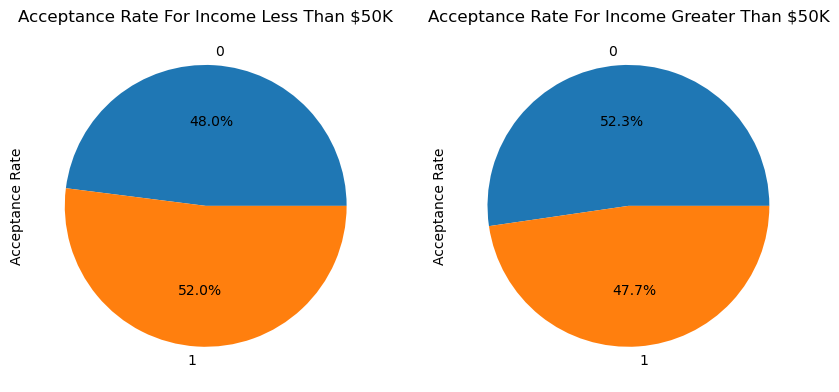

In [88]:
#Acceptance Rate for income less than $50K
data_coffee_incomeLessThan50K = data_coffee.loc[(data_coffee['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
data_coffee_incomeLessThan50K_acceptance_rate = round(data_coffee_incomeLessThan50K['Y'].value_counts(normalize=True).rename('Acceptance Rate').sort_index() * 100,1)

#Acceptance Rate for income greater than $50K
data_coffee_incomeGreaterThan50K = data_coffee.loc[~(data_coffee['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
data_coffee_incomeGreaterThan50K_acceptance_rate = round(data_coffee_incomeGreaterThan50K['Y'].value_counts(normalize=True).rename('Acceptance Rate').sort_index() * 100,1)

#Visualizing and comparing with pie charts 
plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)  # 3 row, 1 columns, first subplot
plot1 = data_coffee_incomeLessThan50K_acceptance_rate.plot.pie(labels=data_coffee_incomeLessThan50K_acceptance_rate.index, autopct='%1.1f%%')
plt.title('Acceptance Rate For Income Less Than $50K')

plt.subplot(1, 2, 2)  # 3 row, 1 columns, second subplot
plot1 = data_coffee_incomeGreaterThan50K_acceptance_rate.plot.pie(labels=data_coffee_incomeGreaterThan50K_acceptance_rate.index, autopct='%1.1f%%')
plt.title('Acceptance Rate For Income Greater Than $50K')

plt.show() 

6. Compare the acceptance rate between those who went to a Coffee House less than once to those who went more than once 

***
Coffee Coupon acceptance rate is higher if the driver goes to coffee house 1 ot more times compared to those that go to coffee house less than once in a month 
***

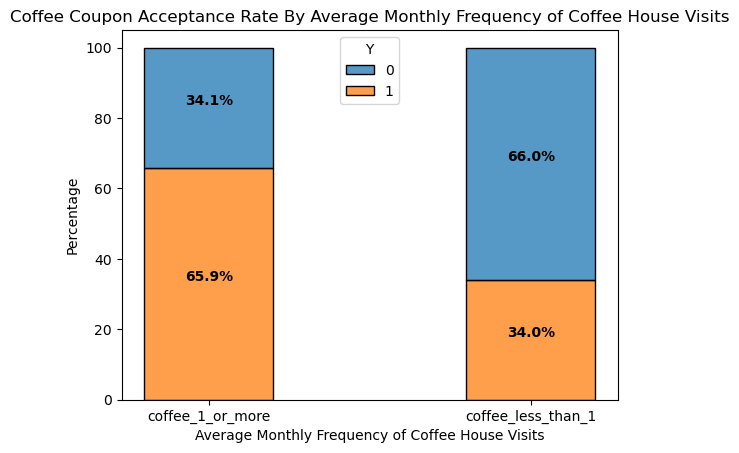

In [91]:
#Create a new column based on column CoffeeHouse to flag those who went to Coffee House less than once a month 
data_coffee['coffee_1_or_more'] = np.where(data_coffee['CoffeeHouse'].isin(['never','less1']), 'coffee_less_than_1', 'coffee_1_or_more')

#Accpetance rates for those who went to Coffee House 1 or more times a month vs those who went less than once a month 
coffee_acceptance_by_coffee_frequency = round(data_coffee.groupby('coffee_1_or_more')['Y'].value_counts(normalize=True) *100,1).reset_index(name='percentage').sort_values(by=['coffee_1_or_more', 'Y'])

#Create a plot to compare acceptance rates for those who went to Coffee House 1 or more times a month vs those who went less than once a month 
myplot = sns.histplot(data=coffee_acceptance_by_coffee_frequency, x="coffee_1_or_more" , hue="Y", weights='percentage', multiple = 'stack',shrink = 0.4)
sns.move_legend(myplot, "upper center")
plt.title('Coffee Coupon Acceptance Rate By Average Monthly Frequency of Coffee House Visits')
plt.xlabel('Average Monthly Frequency of Coffee House Visits')
plt.ylabel('Percentage')

# Add data labels
for patch in myplot.patches:
    height = patch.get_height()
    if height > 0:  
        myplot.text(
            patch.get_x() + patch.get_width() / 2,  
            patch.get_y()+height/2,  
            str(round(height,1)) + "%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
        )
plt.show() 